<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PFDS" data-toc-modified-id="PFDS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center><b>PFDS</b></center></a></span></li><li><span><a href="#Asg-28.10" data-toc-modified-id="Asg-28.10-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><center><b>Asg 28.10</b></center></a></span></li><li><span><a href="#MultiIndex-DataFrames-(Coding)" data-toc-modified-id="MultiIndex-DataFrames-(Coding)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><center><b>MultiIndex DataFrames (Coding)</b></center></a></span></li><li><span><a href="#Extra-Credit-Assignment" data-toc-modified-id="Extra-Credit-Assignment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><center><b><span style="color:red">Extra Credit Assignment</span></b></center></a></span><ul class="toc-item"><li><span><a href="#CONGRATULATIONS!!!" data-toc-modified-id="CONGRATULATIONS!!!-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><center>CONGRATULATIONS!!!</center></a></span></li><li><span><a href="#YOU-HAVE-FINISHED-THE-EXTRA-CREDIT-ASSIGNMENT." data-toc-modified-id="YOU-HAVE-FINISHED-THE-EXTRA-CREDIT-ASSIGNMENT.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><center>YOU HAVE FINISHED THE EXTRA CREDIT ASSIGNMENT.</center></a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# <center><b>PFDS</b></center>
# <center><b>Asg 28.10</b></center>
# <center><b>MultiIndex DataFrames (Coding)</b></center>
# <center><b><span style="color:red">Extra Credit Assignment</span></b></center>

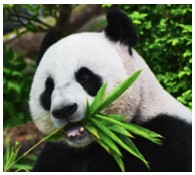

<font size="3"><span style="color:purple"><b>You can watch the video below and/or read the article below to help you understand MultiIndex DataFrames in Pandas.</b></span></font>

<font size="3"><span style="color:purple"><b>Note:  In the future, additional notes will also be provided.</b></span></font>

**Video:**&emsp;[**How do I use the MultiIndex in pandas?**](https://www.youtube.com/watch?v=tcRGa2soc-c&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=32)<br>

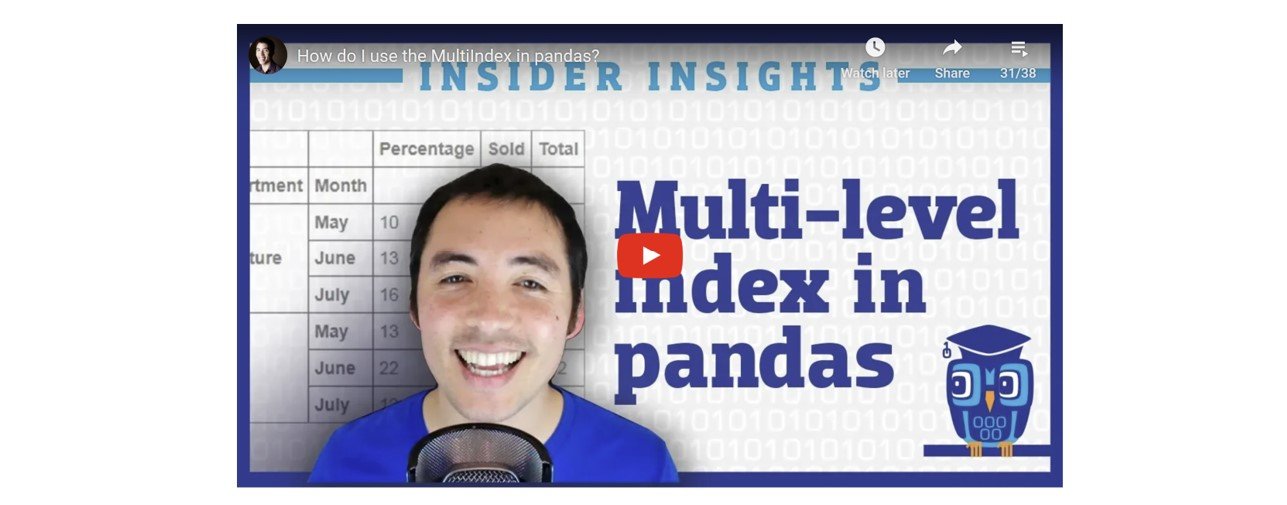

**Article:**&emsp;[**Working with Multi-Index Pandas DataFrames**](https://towardsdatascience.com/working-with-multi-index-pandas-dataframes-f64d2e2c3e02)<br>

In [23]:
# set up notebook to display multiple output in one cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('The notebook is set up to display multiple output in one cell.')

The notebook is set up to display multiple output in one cell.


In [24]:
# conventional way to import pandas and numpy

import pandas as pd
import numpy as np

<div class="alert alert-block alert-warning">
<b><font size="4">Files needed for this assignment:</font></b>
</div>

[**investments.csv**](https://drive.google.com/file/d/1-2lDqbwtCc57wKwo0Mdhci-re3yIiP67/view?usp=share_link)<br>

- The [**investments.csv**](https://drive.google.com/file/d/1-2lDqbwtCc57wKwo0Mdhci-re3yIiP67/view?usp=share_link) data set holds more than 27,000 records of startup investments gathered from the website Crunchbase. 
- Each startup has a Name, a Market, a Status, a State of operation, and a number of Funding Rounds.

<div class="alert alert-block alert-info">
<center><b><font size="5">PART ONE:&emsp;IMPORT & INSPECT THE DATASET</font></b></center>
</div>

<div class="alert alert-block alert-info">

a. Read in the dataset [**investments.csv**](https://drive.google.com/file/d/1-2lDqbwtCc57wKwo0Mdhci-re3yIiP67/view?usp=share_link) and store the results in a DataFrame named **investment**.<br>

b. Use the appropriate method to inspect the first 5 lines of the **investment** DataFrame.
    
<p>&nbsp;</p>
    
<b>Desired Output:</b>
    
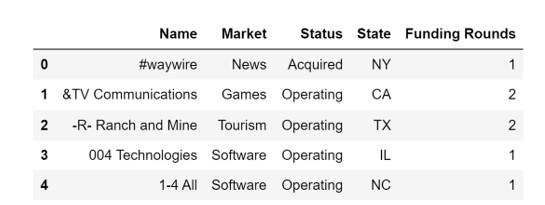

In [25]:
investment = pd.read_csv('investments.csv')
investment.head()

,Name,Market,Status,State,Funding Rounds
0,#waywire,News,Acquired,NY,1
1,&TV Communications,Games,Operating,CA,2
2,-R- Ranch and Mine,Tourism,Operating,TX,2
3,004 Technologies,Software,Operating,IL,1
4,1-4 All,Software,Operating,NC,1


<div class="alert alert-block alert-info">
<center><b><font size="5">PART TWO:&emsp;ADD A MULTIINDEX TO THE DATAFRAME</font></b></center>
</div>

<div class="alert alert-block alert-info">

a. Begin by identifying the number of unique values in each column with the nunique method.<br> 

 - Columns with a small number of unique items usually represent categorical data and are good candidates for index levels.<br>
    
<b>Desired Output:</b>
    
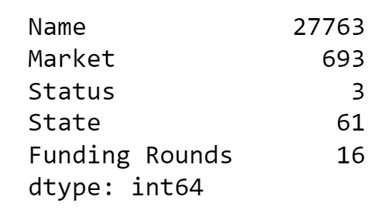

In [26]:
investment['Name'].nunique()
investment['Market'].nunique()
investment['Status'].nunique()
investment['State'].nunique()
investment['Funding Rounds'].nunique()
investment['Funding Rounds'].dtypes

27763

693

3

61

16

dtype('int64')

<div class="alert alert-block alert-info">

b. Create a three-level MultiIndex with the Status, Funding Rounds, and State columns. Order the columns so that the ones with the smallest number of values come first.<br>
- The fewer unique values in a level, the quicker pandas can extract its rows.<br>

**Note:**&emsp;Also sort the DataFrame index to accelerate lookup time. <br>
<p>&nbsp;</p>
<b>Note:</b>&emsp;Use the appropriate method to inspect the first 5 lines of the MultiIndex <b>investment</b> DataFrame.
<p>&nbsp;</p>
<b>Desired Output:</b>
    
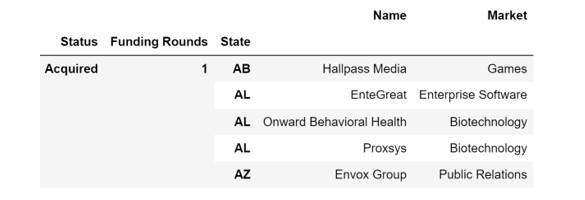

In [27]:
investment = investment.set_index(['Status', 'Funding Rounds', 'State']).sort_index()
investment.head()

Name               Market
Status   Funding Rounds State                                               
Acquired 1              AB               Hallpass Media                Games
                        AL                    EnteGreat  Enterprise Software
                        AL     Onward Behavioral Health        Biotechnology
                        AL                      Proxsys        Biotechnology
                        AZ                  Envox Group     Public Relations

<div class="alert alert-block alert-info">
<center><b><font size="5">PART THREE:&emsp;PERFORM THE FOLLOWING TASKS</font></b></center>
</div>

<div class="alert alert-block alert-success"><b>Task 1:</b>
<p>&nbsp;</p>   
Extract all rows with a Status of "Closed".<br>
<p>&nbsp;</p>
<b>Desired Output:</b>   
    
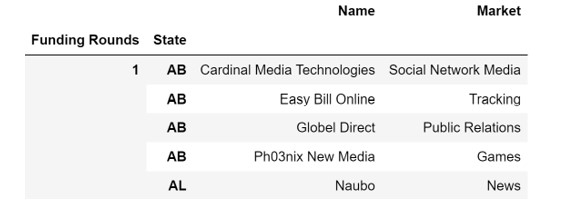

In [28]:
investment.xs('Closed', level='Status').head()

Name                Market
Funding Rounds State                                                   
1              AB     Cardinal Media Technologies  Social Network Media
               AB                Easy Bill Online              Tracking
               AB                   Globel Direct      Public Relations
               AB               Ph03nix New Media                 Games
               AL                           Naubo                  News

<div class="alert alert-block alert-success"><b>Task 2:</b>
<p>&nbsp;</p>   
Extract all rows with a Status of "Acquired" and 10 funding rounds.<br>
<p>&nbsp;</p>
<b>Desired Output:</b>   
    
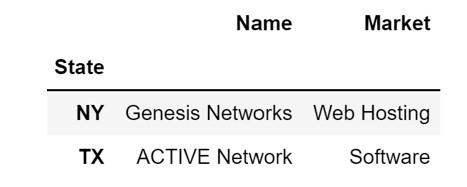

In [31]:
investment.xs(('Acquired', 10), level=('Status', 'Funding Rounds')).head()

,Name,Market
State,,
NY,Genesis Networks,Web Hosting
TX,ACTIVE Network,Software


<div class="alert alert-block alert-success"><b>Task 3:</b>
<p>&nbsp;</p>   
Extract all rows with a Status of "Operating", six funding rounds, and a State of "NJ".<br>
<p>&nbsp;</p>
<b>Desired Output:</b>   
    
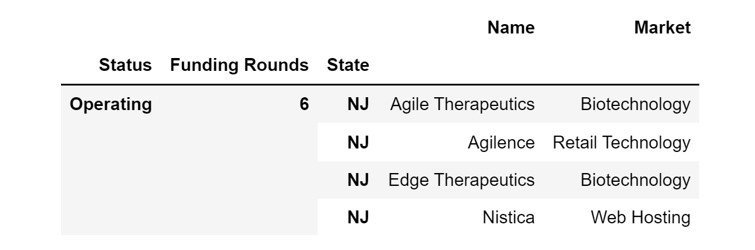

In [32]:
investment.xs(('Operating', 6, 'NJ'), level=('Status', 'Funding Rounds', 'State')).head()

Name             Market
Status    Funding Rounds State                                       
Operating 6              NJ     Agile Therapeutics      Biotechnology
                         NJ               Agilence  Retail Technology
                         NJ      Edge Therapeutics      Biotechnology
                         NJ                Nistica        Web Hosting

<div class="alert alert-block alert-success"><b>Task 4:</b>
<p>&nbsp;</p>   
Extract all rows with a Status of "Closed" and eight funding rounds. Pull out only the Name column.<br>
<p>&nbsp;</p>
<b>Desired Output:</b>   
    
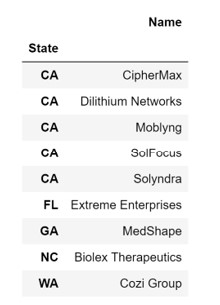

In [33]:
investment.xs(('Closed', 8), level=('Status', 'Funding Rounds'))['Name']

State
CA              CipherMax
CA     Dilithium Networks
CA                Moblyng
CA               SolFocus
CA               Solyndra
FL    Extreme Enterprises
GA               MedShape
NC    Biolex Therapeutics
WA             Cozi Group
Name: Name, dtype: object

<div class="alert alert-block alert-success"><b>Task 5:</b>
<p>&nbsp;</p>   
Extract all rows with a State of "NJ", irrespective of the values in the Status and Funding Rounds levels.<br>
<p>&nbsp;</p>
<b>Desired Output:</b>   
    
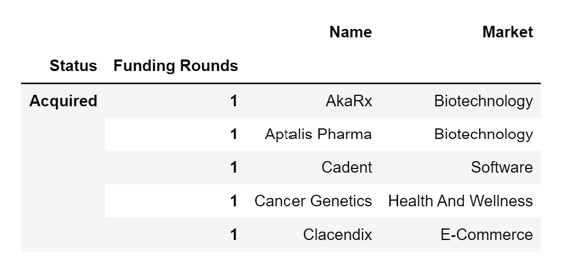

In [34]:
investment.xs('NJ', level='State').head()

Name               Market
Status   Funding Rounds                                      
Acquired 1                         AkaRx        Biotechnology
         1                Aptalis Pharma        Biotechnology
         1                        Cadent             Software
         1               Cancer Genetics  Health And Wellness
         1                     Clacendix           E-Commerce

<div class="alert alert-block alert-success"><b>Task 5:</b>
<p>&nbsp;</p>   
Reincorporate the MultiIndex levels back into the DataFrame as columns.<br>
<p>&nbsp;</p>
<b>Desired Output:</b>   
    
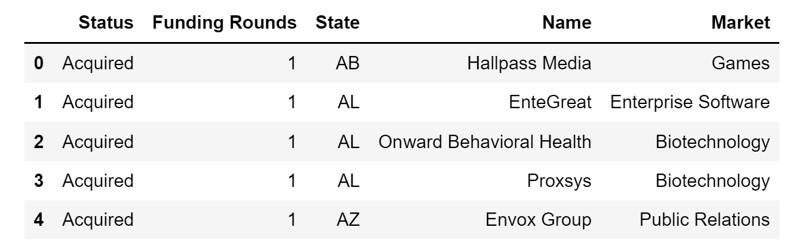

In [36]:
investment.reset_index().head()

,Status,Funding Rounds,State,Name,Market
0,Acquired,1,AB,Hallpass Media,Games
1,Acquired,1,AL,EnteGreat,Enterprise Software
2,Acquired,1,AL,Onward Behavioral Health,Biotechnology
3,Acquired,1,AL,Proxsys,Biotechnology
4,Acquired,1,AZ,Envox Group,Public Relations


## <center>CONGRATULATIONS!!!</center>
## <center>YOU HAVE FINISHED THE EXTRA CREDIT ASSIGNMENT.</center>

# Summary
- A MultiIndex is an index made of multiple levels.
- A MultiIndex uses tuples of values to store its labels.
- A DataFrame can store a MultiIndex on both its row and column axis.
- The sort_index method sorts MultiIndex levels. Pandas can sort index levels individually or as a group.
- The label-based loc and the position-based iloc accessors require additional arguments to extract the proper combination of rows and columns.
- Pass tuples to the loc and iloc accessors to avoid ambiguity.
- The reset_index method integrates index levels as DataFrame columns.
- Pass the set_index method a list of columns to build a MultiIndex from existing DataFrame columns.